In [86]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

In [87]:
sdf0= pd.read_json('StreamingHistory0.json')
sdf1= pd.read_json('StreamingHistory1.json')
sdf2= pd.read_json('StreamingHistory2.json')
sdf=pd.concat([sdf0,sdf1,sdf2])
sdf.shape

(22870, 4)

In [89]:
a = sdf.msPlayed.div(1000).astype(int)

sdf.msPlayed = a

sdf


,endTime,artistName,trackName,msPlayed
0,2021-07-15 09:21,Thirsty Merc,Betty Page,37
1,2021-07-15 10:52,CLiQ,"Wavey (feat. Wiley, Alika & Double S) - VIP Mix",29
2,2021-07-18 02:48,Post Malone,Motley Crew,184
3,2021-07-18 02:49,Post Malone,rockstar (feat. 21 Savage),16
4,2021-07-18 09:39,Kanye West,Bound 2,0
...,...,...,...,...
2865,2022-07-16 16:01,Erik ASMR,Pepper Shaker - Loopable,89
2866,2022-07-16 16:03,John N4ture,Almost There,69
2867,2022-07-16 16:06,Miss Manganese ASMR,QUICK and rushed MASSAGE with heavy breathing,216
2868,2022-07-16 16:10,FrivolousFox ASMR,"Ear to Ear Kisses, Soft Breathing and Whispers...",249


In [90]:
r = sdf.rename(columns={"msPlayed":'SecondsPlayed'})

r

,endTime,artistName,trackName,SecondsPlayed
0,2021-07-15 09:21,Thirsty Merc,Betty Page,37
1,2021-07-15 10:52,CLiQ,"Wavey (feat. Wiley, Alika & Double S) - VIP Mix",29
2,2021-07-18 02:48,Post Malone,Motley Crew,184
3,2021-07-18 02:49,Post Malone,rockstar (feat. 21 Savage),16
4,2021-07-18 09:39,Kanye West,Bound 2,0
...,...,...,...,...
2865,2022-07-16 16:01,Erik ASMR,Pepper Shaker - Loopable,89
2866,2022-07-16 16:03,John N4ture,Almost There,69
2867,2022-07-16 16:06,Miss Manganese ASMR,QUICK and rushed MASSAGE with heavy breathing,216
2868,2022-07-16 16:10,FrivolousFox ASMR,"Ear to Ear Kisses, Soft Breathing and Whispers...",249


In [91]:
x = r.sort_values(by="SecondsPlayed",ascending=False)

x

,endTime,artistName,trackName,SecondsPlayed
8858,2022-05-13 19:51,The ASMR Psychologist,Reality Shifting (Movie Method),1741
6690,2022-04-20 18:07,FoxenKin ASMR,Helping You Feel Better,1183
6348,2022-04-15 16:06,FoxenKin ASMR,Tingly Inaudible Whispers,1179
8176,2022-05-02 15:27,FoxenKin ASMR,Tingly Inaudible Whispers,1179
1721,2022-06-29 19:10,Lin ASMR,ASMR Super Sensitive Mouth Sounds Pt.3,1173
...,...,...,...,...
5085,2022-03-29 01:17,"Tyler, The Creator",See You Again (feat. Kali Uchis),0
1602,2022-02-24 07:07,BROCKHAMPTON,SUGAR,0
1130,2021-08-03 11:57,Tevvez,Mystique,0
1840,2022-07-01 05:48,Dixie,On Your Toes,0


,endTime,artistName,trackName,SecondsPlayed
8858,2022-05-13 19:51,The ASMR Psychologist,Reality Shifting (Movie Method),1741
6690,2022-04-20 18:07,FoxenKin ASMR,Helping You Feel Better,1183
6348,2022-04-15 16:06,FoxenKin ASMR,Tingly Inaudible Whispers,1179
8176,2022-05-02 15:27,FoxenKin ASMR,Tingly Inaudible Whispers,1179
1721,2022-06-29 19:10,Lin ASMR,ASMR Super Sensitive Mouth Sounds Pt.3,1173
...,...,...,...,...
5085,2022-03-29 01:17,"Tyler, The Creator",See You Again (feat. Kali Uchis),0
1602,2022-02-24 07:07,BROCKHAMPTON,SUGAR,0
1130,2021-08-03 11:57,Tevvez,Mystique,0
1840,2022-07-01 05:48,Dixie,On Your Toes,0


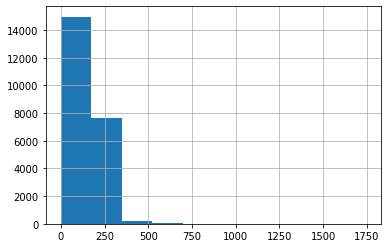

In [92]:
x.SecondsPlayed.hist()

x

<AxesSubplot:>

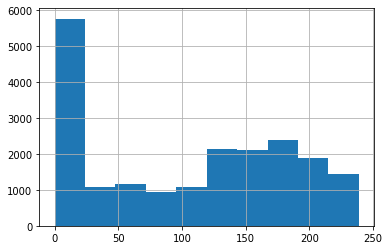

In [93]:
x.SecondsPlayed[(x.SecondsPlayed < 240)].hist()

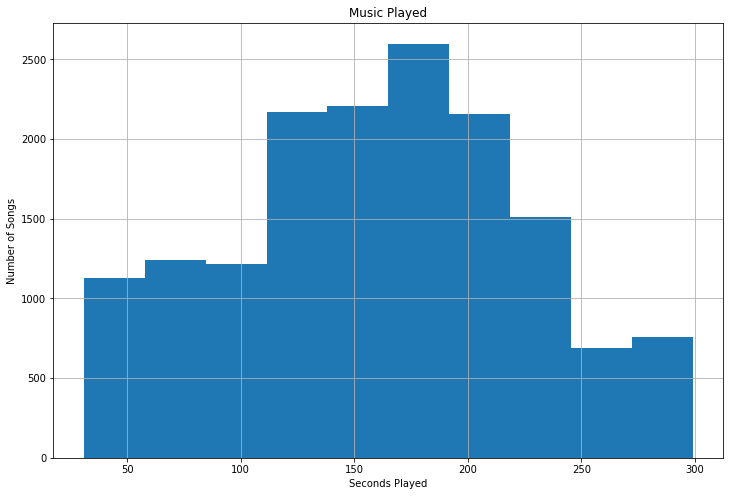

In [109]:
x.SecondsPlayed[(x.SecondsPlayed > 30) & (x.SecondsPlayed < 300)].hist()

plt.xlabel("Seconds Played")
plt.ylabel("Number of Songs")
plt.title("Music Played")
plt.show()



In [108]:
plt.rcParams['figure.figsize']=(12,8)

In [7]:
sdf.artistName.value_counts().plot(kind="barh")
sdf.artistNameJoey Bada$$ '$''s'


<AxesSubplot:>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21202 (\N{CJK UNIFIED IDEOGRAPH-52D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Joey Bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 432x288 with 1 Axes>